<a href="https://colab.research.google.com/github/GPoleto27/Keras_Studying/blob/main/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mnist

In [2]:
import numpy as np
import mnist
from tensorflow import keras

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [4]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


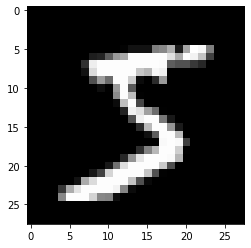

In [5]:
from matplotlib import pyplot as plt
img = train_images[0]
plt.imshow(img, cmap='gray')

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [8]:
# Flatten the images.
#train_images = train_images.reshape((-1, 784))
#test_images = test_images.reshape((-1, 784))

In [9]:
print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [11]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(28,28,1)),
                    Flatten(),
                    Dense(10, activation='softmax'),
])

In [12]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  batch_size=64,
)

Epoch 1/3
938/938 [==============================] - 10s 8ms/step - loss: 0.1854 - accuracy: 0.9460
Epoch 2/3
938/938 [==============================] - 7s 8ms/step - loss: 0.0700 - accuracy: 0.9791
Epoch 3/3
938/938 [==============================] - 5s 6ms/step - loss: 0.0517 - accuracy: 0.9837


In [15]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9818


[0.05790530517697334, 0.9818000197410583]

In [16]:
model.save_weights('model.h5')

In [17]:
# Build the model.
model = Sequential([
                    Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(28,28,1)),
                    Flatten(),
                    Dense(10, activation='softmax'),
])
# Load the model's saved weights.
model.load_weights('model.h5')

In [18]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:37])

# Print our model's predictions.
print("Predictions: ", np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print("Ground truth:", test_labels[:37]) # [7, 2, 1, 0, 4]

Predictions:  [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7]
Ground truth: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7]


In [19]:
import cv2
from glob import glob
from PIL import Image

In [20]:
for filename in glob("digitos/*.png"):
    frame = cv2.imread(filename, 0)
    img = Image.fromarray(frame)
    img = img.resize((28,28))
    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    print(filename.split("/")[-1], "=", prediction.argmax())

4.png = 4
3.png = 3
6.png = 5
j.png = 8
2.png = 3
1.png = 1
5.png = 5
8.png = 8
7.png = 3
0.png = 0
9.png = 9
